In [1]:
import numpy as np
import pandas as pd
from google.colab import files
import io
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Activation , Dropout
from tensorflow.keras.utils import to_categorical,plot_model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

Instructions for updating:
non-resource variables are not supported in the long term


In [13]:
uploaded = files.upload()

Saving ohcl_ny.csv to ohcl_ny.csv


In [14]:
data = pd.read_csv(io.BytesIO(uploaded['ohcl_ny.csv']))

In [15]:
data.head()

,Unnamed: 0,YEAR,DAY,MONTH,HOUR,Inside,Outside,Unknown,Fri,Mon,Sat,Sun,Thu,Tue,Wed,AMERICAN INDIAN/ALASKAN NATIVE,ASIAN / PACIFIC ISLANDER,BLACK,BLACK HISPANIC,UNKNOWN,WHITE,WHITE HISPANIC,F,M,U,18-24,25-44,45-64,65+,<18,Unknown_Age,cat_code,hood_cd,street_cd
0,2,2016,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,2,0,0
1,3,2016,1,1,17,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,1
2,5,2016,1,1,12,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,2,2
3,7,2016,1,1,17,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,1,3
4,8,2016,1,1,22,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,2,3,4


In [16]:
data = data.drop(['Unnamed: 0'], axis = 1)

y = data['cat_code']
x = data.drop(['cat_code'], axis = 1)

In [17]:
y = pd.get_dummies(y)

x = np.array(x)
y = np.array(y)
print(x)
print(y)

[[2016    1    1 ...    1    0    0]
 [2016    1    1 ...    0    1    1]
 [2016    1    1 ...    0    2    2]
 ...
 [2020   31   12 ...    1  245 1065]
 [2020   31   12 ...    1  245 4997]
 [2020   31   12 ...    0  254 5170]]
[[0 0 1]
 [0 1 0]
 [1 0 0]
 ...
 [0 1 0]
 [0 0 1]
 [0 1 0]]


In [18]:
X_train, X_test, y_train,y_test = train_test_split(x, y, test_size=.3, random_state=42)

In [19]:
feat = X_train.shape[1]
rows = X_train.shape
labels = y_train.shape[1]

In [20]:

from keras import metrics
#network parameters 
batch_size = 128
hidden_nodes = 256
dropout = 0.45

# the model has 3 layers MLP with relu and a dropout after each layer 
model = Sequential()
model.add(Dense(hidden_nodes, input_dim = feat))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_nodes))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(labels))
#the output 
model.add(Activation('softmax'))
model.summary()
#lossfunction for one-hot-encoder 
#use adam optimizer
#accuracy is a good metric for the classifier 
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               8448      
                                                                 
 activation_3 (Activation)   (None, 256)               0         
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 activation_4 (Activation)   (None, 256)               0         
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 3)                

In [21]:
#train the network 
clf = model.fit(X_train,y_train,epochs = 10 , batch_size = batch_size)

#validate the model on the test dataset to determine generalization 
_,Accuracy = model.evaluate(X_test, y_test, batch_size = batch_size, verbose = 0 )
print("\nTest Accuracy: %.1f%%" % (100.0 * Accuracy))

Train on 1557152 samples
Epoch 1/10
1557152/1557152 [==============================] - 67s 43us/sample - loss: 1.5983 - acc: 0.5341
Epoch 2/10
1557152/1557152 [==============================] - 66s 42us/sample - loss: 0.9863 - acc: 0.5370
Epoch 3/10
1557152/1557152 [==============================] - 67s 43us/sample - loss: 0.9854 - acc: 0.5370
Epoch 4/10
1557152/1557152 [==============================] - 67s 43us/sample - loss: 0.9854 - acc: 0.5370
Epoch 5/10
1557152/1557152 [==============================] - 68s 44us/sample - loss: 0.9853 - acc: 0.5370
Epoch 6/10
1557152/1557152 [==============================] - 67s 43us/sample - loss: 0.9854 - acc: 0.5370
Epoch 7/10
1557152/1557152 [==============================] - 67s 43us/sample - loss: 0.9853 - acc: 0.5370
Epoch 8/10
1557152/1557152 [==============================] - 70s 45us/sample - loss: 0.9854 - acc: 0.5370
Epoch 9/10
1557152/1557152 [==============================] - 67s 43us/sample - loss: 0.9852 - acc: 0.5370
Epoch 10/10


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates



Test Accuracy: 53.7%


In [22]:
score = model.evaluate(X_test, y_test, verbose=0)    
testPredict = model.predict(X_test)
y_test_tmp = np.argmax(y_test, axis=1)
y_pred_tmp = np.argmax(testPredict, axis=1)

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [23]:
print(classification_report(y_test_tmp,y_pred_tmp))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00    102336
           1       0.54      1.00      0.70    358418
           2       0.00      0.00      0.00    206597

    accuracy                           0.54    667351
   macro avg       0.18      0.33      0.23    667351
weighted avg       0.29      0.54      0.38    667351



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


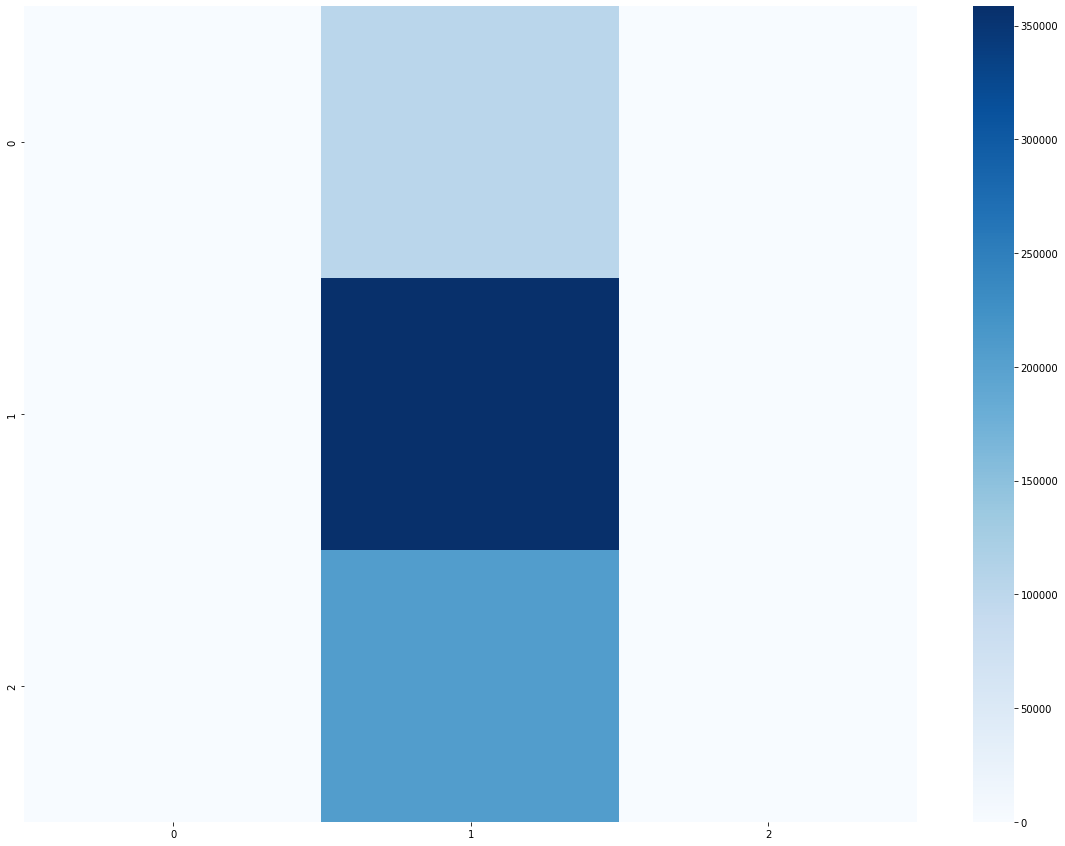

In [24]:
matrix = confusion_matrix(y_test_tmp,y_pred_tmp)


plt.subplots(figsize=(20,15))
ax = sns.heatmap(matrix, cmap = 'Blues')

### Run #2

In [22]:
uploaded = files.upload()

Saving ohcl_ny2.csv to ohcl_ny2.csv


In [23]:
data = pd.read_csv(io.BytesIO(uploaded['ohcl_ny2.csv']))

In [24]:
data = data.drop(['Unnamed: 0'], axis = 1)

y = data['cat_code']
x = data.drop(['cat_code'], axis = 1)

In [25]:
y = pd.get_dummies(y)

x = np.array(x)
y = np.array(y)
print(x)
print(y)

[[2016    1    1 ...    0    0    0]
 [2016    1    1 ...    0    1    1]
 [2016    1    1 ...    0    2    2]
 ...
 [2020   31   12 ...    1  245 1065]
 [2020   31   12 ...    1  245 4997]
 [2020   31   12 ...    1  254 5170]]
[[0 0 1]
 [0 1 0]
 [1 0 0]
 ...
 [0 1 0]
 [0 0 1]
 [0 1 0]]


In [26]:
X_train, X_test, y_train,y_test = train_test_split(x, y, test_size=.3, random_state=42)

In [27]:
feat = X_train.shape[1]
rows = X_train.shape
labels = y_train.shape[1]

In [28]:
#network parameters 
batch_size = 128
hidden_nodes = 256
dropout = 0.45

# the model has 3 layers MLP with relu and a dropout after each layer 
model = Sequential()
model.add(Dense(hidden_nodes, input_dim = feat))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_nodes))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(labels))
#the output 
model.add(Activation('softmax'))
model.summary()
#lossfunction for one-hot-encoder 
#use adam optimizer
#accuracy is a good metric for the classifier 
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               4352      
                                                                 
 activation_6 (Activation)   (None, 256)               0         
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               65792     
                                                                 
 activation_7 (Activation)   (None, 256)               0         
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 3)                

In [29]:
#train the network 
clf = model.fit(X_train,y_train,epochs = 10 , batch_size = batch_size)

#validate the model on the test dataset to determine generalization 
_,Accuracy = model.evaluate(X_test, y_test, batch_size = batch_size, verbose = 0 )
print("\nTest Accuracy: %.1f%%" % (100.0 * Accuracy))

Train on 1557152 samples
Epoch 1/10
1557152/1557152 [==============================] - 71s 45us/sample - loss: 1.4911 - acc: 0.5344
Epoch 2/10
1557152/1557152 [==============================] - 73s 47us/sample - loss: 0.9855 - acc: 0.5370
Epoch 3/10
1557152/1557152 [==============================] - 73s 47us/sample - loss: 0.9855 - acc: 0.5370
Epoch 4/10
1557152/1557152 [==============================] - 74s 47us/sample - loss: 0.9855 - acc: 0.5370
Epoch 5/10
1557152/1557152 [==============================] - 72s 46us/sample - loss: 0.9854 - acc: 0.5370
Epoch 6/10
1557152/1557152 [==============================] - 73s 47us/sample - loss: 0.9853 - acc: 0.5370
Epoch 7/10
1557152/1557152 [==============================] - 74s 48us/sample - loss: 0.9853 - acc: 0.5370
Epoch 8/10
1557152/1557152 [==============================] - 73s 47us/sample - loss: 0.9853 - acc: 0.5370
Epoch 9/10
1557152/1557152 [==============================] - 73s 47us/sample - loss: 0.9853 - acc: 0.5370
Epoch 10/10


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates



Test Accuracy: 53.7%


In [30]:
score = model.evaluate(X_test, y_test, verbose=0)    
testPredict = model.predict(X_test)
y_test_tmp = np.argmax(y_test, axis=1)
y_pred_tmp = np.argmax(testPredict, axis=1)

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [31]:
print(classification_report(y_test_tmp,y_pred_tmp))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00    102336
           1       0.54      1.00      0.70    358418
           2       0.00      0.00      0.00    206597

    accuracy                           0.54    667351
   macro avg       0.18      0.33      0.23    667351
weighted avg       0.29      0.54      0.38    667351



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


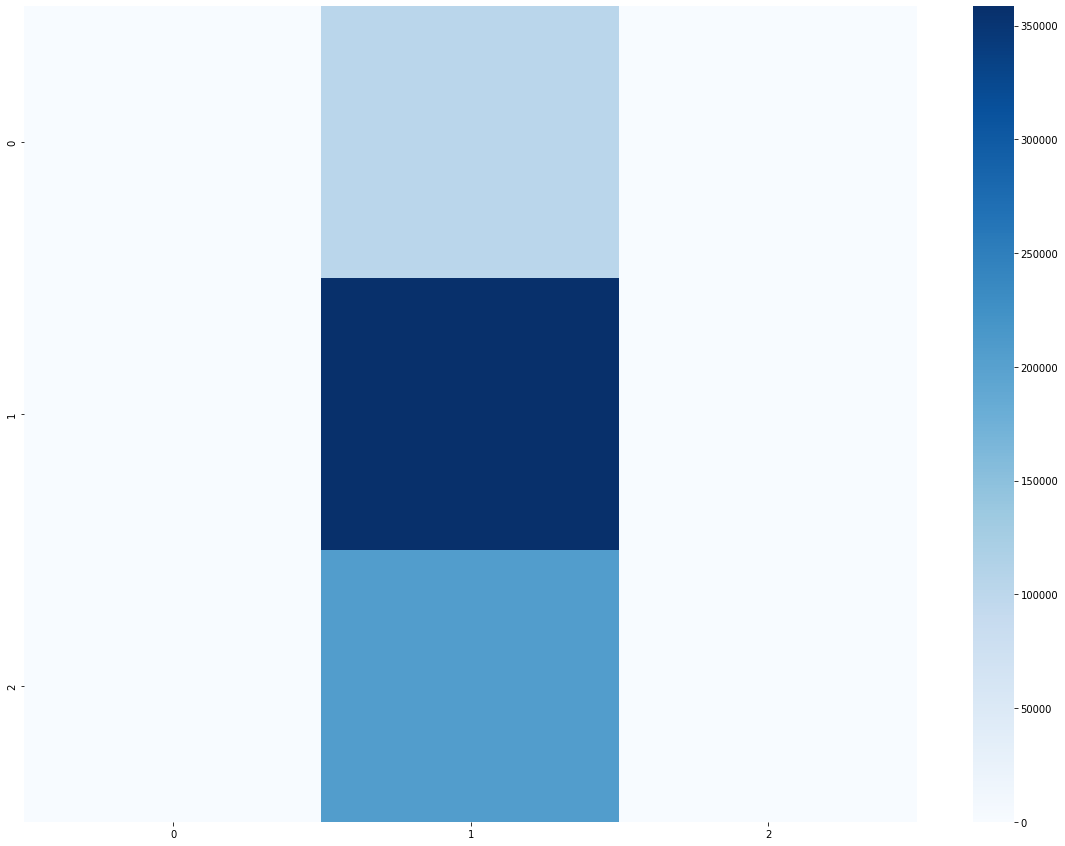

In [32]:
matrix = confusion_matrix(y_test_tmp,y_pred_tmp)


plt.subplots(figsize=(20,15))
ax = sns.heatmap(matrix, cmap = 'Blues')

### Run #3



In [33]:
uploaded = files.upload()

Saving ohcl_ny3.csv to ohcl_ny3.csv


In [34]:
data = pd.read_csv(io.BytesIO(uploaded['ohcl_ny3.csv']))

In [35]:
data = data.drop(['Unnamed: 0'], axis = 1)

y = data['cat_code']
x = data.drop(['cat_code'], axis = 1)

In [36]:
y = pd.get_dummies(y)

x = np.array(x)
y = np.array(y)
print(x)
print(y)

[[ 4.07511923e+01 -7.39783569e+01  2.01600000e+03 ...  0.00000000e+00
   1.00000000e+00  0.00000000e+00]
 [ 4.07689189e+01 -7.39849903e+01  2.01600000e+03 ...  0.00000000e+00
   0.00000000e+00  1.00000000e+00]
 [ 4.07378573e+01 -7.40081819e+01  2.01600000e+03 ...  0.00000000e+00
   0.00000000e+00  2.00000000e+00]
 ...
 [ 4.06417383e+01 -7.40756780e+01  2.02000000e+03 ...  0.00000000e+00
   1.00000000e+00  1.06500000e+03]
 [ 4.06447261e+01 -7.40774832e+01  2.02000000e+03 ...  0.00000000e+00
   1.00000000e+00  4.99700000e+03]
 [ 4.05989432e+01 -7.40637606e+01  2.02000000e+03 ...  0.00000000e+00
   0.00000000e+00  5.17000000e+03]]
[[0 0 1]
 [0 1 0]
 [1 0 0]
 ...
 [0 1 0]
 [0 0 1]
 [0 1 0]]


In [37]:
X_train, X_test, y_train,y_test = train_test_split(x, y, test_size=.3, random_state=42)

In [38]:
feat = X_train.shape[1]
rows = X_train.shape
labels = y_train.shape[1]

In [39]:
#network parameters 
batch_size = 128
hidden_nodes = 256
dropout = 0.45

# the model has 3 layers MLP with relu and a dropout after each layer 
model = Sequential()
model.add(Dense(hidden_nodes, input_dim = feat))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_nodes))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(labels))
#the output 
model.add(Activation('softmax'))
model.summary()
#lossfunction for one-hot-encoder 
#use adam optimizer
#accuracy is a good metric for the classifier 
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 256)               8704      
                                                                 
 activation_9 (Activation)   (None, 256)               0         
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 256)               65792     
                                                                 
 activation_10 (Activation)  (None, 256)               0         
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 3)                

In [40]:
#train the network 
clf = model.fit(X_train,y_train,epochs = 10 , batch_size = batch_size)

#validate the model on the test dataset to determine generalization 
_,Accuracy = model.evaluate(X_test, y_test, batch_size = batch_size, verbose = 0 )
print("\nTest Accuracy: %.1f%%" % (100.0 * Accuracy))


Train on 1557152 samples
Epoch 1/10
1557152/1557152 [==============================] - 78s 50us/sample - loss: 1.5156 - acc: 0.5343
Epoch 2/10
1557152/1557152 [==============================] - 73s 47us/sample - loss: 0.9859 - acc: 0.5370
Epoch 3/10
1557152/1557152 [==============================] - 75s 48us/sample - loss: 0.9853 - acc: 0.5370
Epoch 4/10
1557152/1557152 [==============================] - 73s 47us/sample - loss: 0.9854 - acc: 0.5370
Epoch 5/10
1557152/1557152 [==============================] - 73s 47us/sample - loss: 0.9854 - acc: 0.5370
Epoch 6/10
1557152/1557152 [==============================] - 73s 47us/sample - loss: 0.9853 - acc: 0.5370
Epoch 7/10
1557152/1557152 [==============================] - 75s 48us/sample - loss: 0.9854 - acc: 0.5370
Epoch 8/10
1557152/1557152 [==============================] - 74s 47us/sample - loss: 0.9854 - acc: 0.5370
Epoch 9/10
1557152/1557152 [==============================] - 73s 47us/sample - loss: 0.9853 - acc: 0.5370
Epoch 10/10


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates



Test Accuracy: 53.7%


In [41]:
score = model.evaluate(X_test, y_test, verbose=0)    
testPredict = model.predict(X_test)
y_test_tmp = np.argmax(y_test, axis=1)
y_pred_tmp = np.argmax(testPredict, axis=1)

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [43]:
print(classification_report(y_pred_tmp, y_test_tmp))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00    102336
           1       0.54      1.00      0.70    358418
           2       0.00      0.00      0.00    206597

    accuracy                           0.54    667351
   macro avg       0.18      0.33      0.23    667351
weighted avg       0.29      0.54      0.38    667351



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


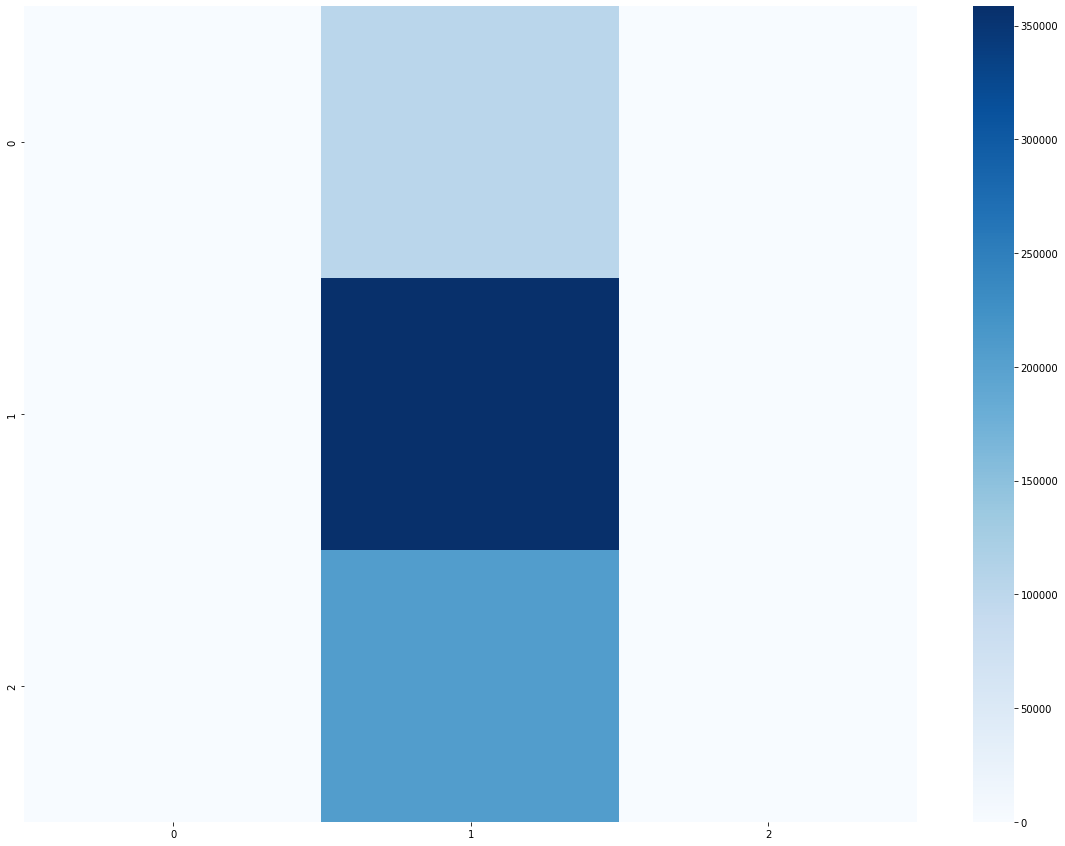

In [44]:
matrix = confusion_matrix(y_pred_tmp, y_test_tmp)


plt.subplots(figsize=(20,15))
ax = sns.heatmap(matrix, cmap = 'Blues')

### Run #4 (Violations Removed)

In [26]:
uploaded = files.upload()

Saving ohcl_ny4.csv to ohcl_ny4 (1).csv


In [27]:
data = pd.read_csv(io.BytesIO(uploaded['ohcl_ny4.csv']))

In [28]:
data = data.drop(['Unnamed: 0'], axis = 1)

y = data['cat_code']
x = data.drop(['cat_code'], axis = 1)

In [29]:
y = pd.get_dummies(y)

x = np.array(x)
y = np.array(y)
print(x)
print(y)

[[2016    1    1 ...    1    0    0]
 [2016    1    1 ...    0    1    1]
 [2016    1    1 ...    1    1    3]
 ...
 [2020   31   12 ...    1  245 1065]
 [2020   31   12 ...    1  245 4997]
 [2020   31   12 ...    0  254 5170]]
[[0 1]
 [1 0]
 [1 0]
 ...
 [1 0]
 [0 1]
 [1 0]]


In [30]:
X_train, X_test, y_train,y_test = train_test_split(x, y, test_size=.3, random_state=42)

In [31]:
feat = X_train.shape[1]
rows = X_train.shape
labels = y_train.shape[1]

In [32]:
#network parameters 
batch_size = 128
hidden_nodes = 256
dropout = 0.45

# the model has 3 layers MLP with relu and a dropout after each layer 
model = Sequential()
model.add(Dense(hidden_nodes, input_dim = feat))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_nodes))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(labels))
#the output 
model.add(Activation('softmax'))
model.summary()
#lossfunction for one-hot-encoder 
#use adam optimizer
#accuracy is a good metric for the classifier 
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               8448      
                                                                 
 activation_6 (Activation)   (None, 256)               0         
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               65792     
                                                                 
 activation_7 (Activation)   (None, 256)               0         
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 2)                

In [33]:
#train the network 
clf = model.fit(X_train,y_train,epochs = 10 , batch_size = batch_size)

#validate the model on the test dataset to determine generalization 
_,Accuracy = model.evaluate(X_test, y_test, batch_size = batch_size, verbose = 0 )
print("\nTest Accuracy: %.1f%%" % (100.0 * Accuracy))


Train on 1317215 samples
Epoch 1/10
1317215/1317215 [==============================] - 61s 46us/sample - loss: 1.1985 - acc: 0.6297
Epoch 2/10
1317215/1317215 [==============================] - 57s 44us/sample - loss: 0.6571 - acc: 0.6345
Epoch 3/10
1317215/1317215 [==============================] - 57s 44us/sample - loss: 0.6572 - acc: 0.6345
Epoch 4/10
1317215/1317215 [==============================] - 57s 43us/sample - loss: 0.6569 - acc: 0.6345
Epoch 5/10
1317215/1317215 [==============================] - 58s 44us/sample - loss: 0.6568 - acc: 0.6345
Epoch 6/10
1317215/1317215 [==============================] - 57s 43us/sample - loss: 0.6566 - acc: 0.6345
Epoch 7/10
1317215/1317215 [==============================] - 57s 43us/sample - loss: 0.6566 - acc: 0.6345
Epoch 8/10
1317215/1317215 [==============================] - 57s 43us/sample - loss: 0.6567 - acc: 0.6345
Epoch 9/10
1317215/1317215 [==============================] - 57s 43us/sample - loss: 0.6567 - acc: 0.6345
Epoch 10/10


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates



Test Accuracy: 63.5%


In [34]:
score = model.evaluate(X_test, y_test, verbose=0)    
testPredict = model.predict(X_test)
y_test_tmp = np.argmax(y_test, axis=1)
y_pred_tmp = np.argmax(testPredict, axis=1)

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [35]:
print(classification_report(y_pred_tmp, y_test_tmp))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      0.64      0.78    564522
           1       0.00      0.00      0.00         0

    accuracy                           0.64    564522
   macro avg       0.50      0.32      0.39    564522
weighted avg       1.00      0.64      0.78    564522



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


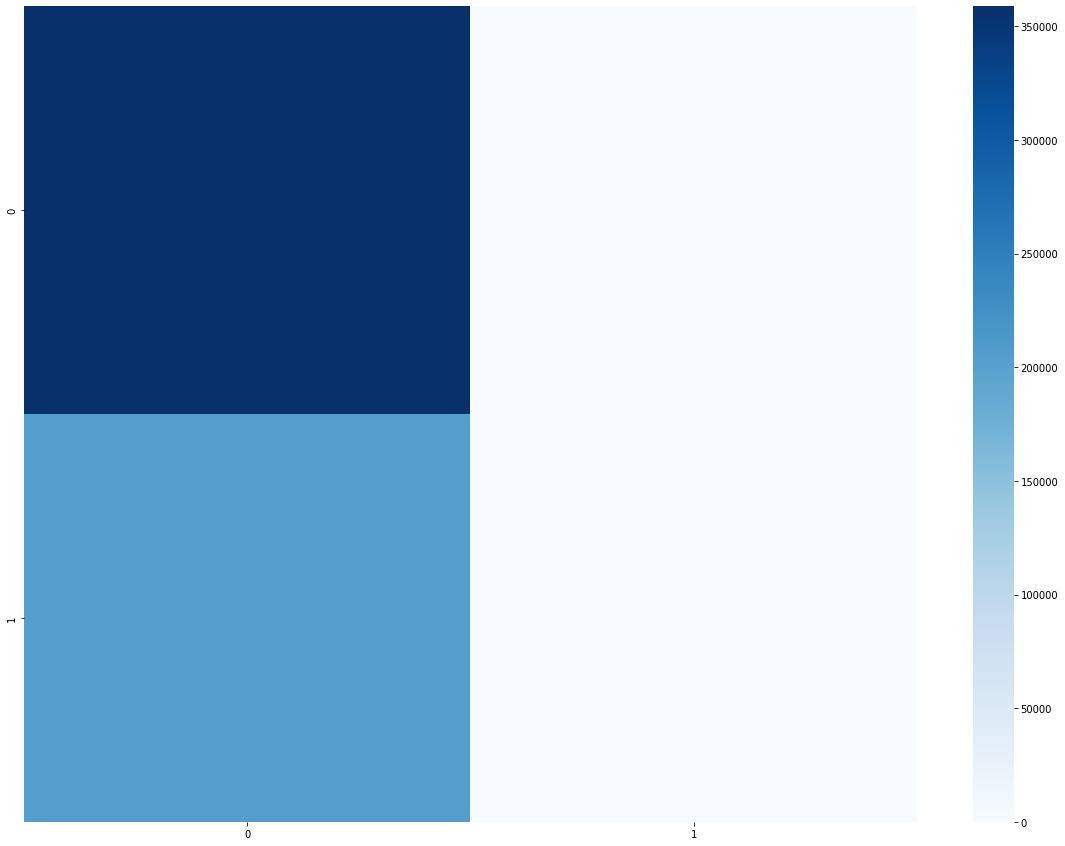

In [36]:
matrix = confusion_matrix(y_test_tmp, y_pred_tmp)

plt.subplots(figsize=(20,15))
ax = sns.heatmap(matrix, cmap = 'Blues')

----------------------------------------------------------